In [1]:
!conda install -c conda-forge tensorflow --yes
!conda install -c conda-forge keras --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

df = pd.read_csv(r"C:\Users\hktse\Documents\IAC\IAC_network1.csv", encoding='ISO-8859-1')
df.shape


# Get names of indexes for which column ccode has value 0.0
indexNames = df[df['ccode'] == 0.].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.shape

def cell_recode(series):
    if series == 1:
        return "Material"
    elif series == 2:
        return "Design"
    elif series == 3:
        return "Capacity"

df['transfer'] = df['transfer_type'].apply(cell_recode)

df = df[['note', 'transfer', 'form']]


df.info()

print(df.head(10))
print(df['note'].apply(lambda x: len(x.split(' '))).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 372
Data columns (total 3 columns):
note        289 non-null object
transfer    289 non-null object
form        289 non-null object
dtypes: object(3)
memory usage: 9.0+ KB
                                                note  transfer           form
0  UK is the sole tier-1 partner (defined by the ...  Capacity  codevelopment
1  Italy is one of the two tier-2 partner, its Pr...  Capacity  codevelopment
2  Netherlands  is one of the two tier-2 partner,...  Capacity  codevelopment
3  Australia is one of the 5 tier-3 partners. Aus...    Design   coproduction
4  Canada is one of the 5 tier-3 partners. Canadi...    Design   coproduction
5  Denmark is one of the 5 tier-3 partners. Danis...    Design   coproduction
6  Norway is one of the 5 tier-3 partners. Norweg...    Design   coproduction
7  Turkey is one of the 5 tier-3 partners. Turkis...    Design   coproduction
8  Israel has joined the F-35 Joint Strike Fighte...  Mate

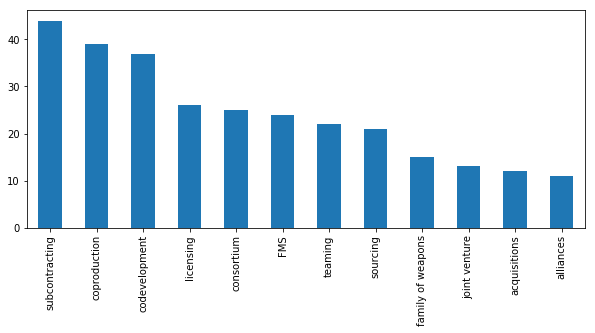

In [3]:
my_tags = ['acquisitions','alliance','codevelopment','consortium','coproduction','family of weapons','FMS','joint venture','licensing','sourcing','subcontracting','teaming']
plt.figure(figsize=(10,4))
df.form.value_counts().plot(kind='bar');

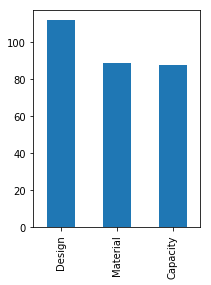

In [4]:
my_tags = ['Material','Capacity','Design']
plt.figure(figsize=(3,4))
df.transfer.value_counts().plot(kind='bar');

In [5]:
def print_plot(index):
    example = df[df.index == index][['note', 'transfer']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)

Lockheed Martin is working with Mitsubishi Heavy Industries on a local final assembly and checkout line for the F-35 Lightning II. The first Japanese-produced F-35 is scheduled to roll off Mitsubishis Nagoya line in 2017, says John Balderson, director of Japan F-35 business development for Lockheed Martin. We are greatly honoured that Japan chose the F-35, he adds, speaking to Flightglobal on the sidelines of the Japan Aerospace show in Nagoya. We have tremendous faith in their industry. Last December, Tokyo selected the F-35 in its F-X competition for 42 aircraft to replace its obsolescent McDonnell Douglas F-4 Phantoms. The stealthy type won the bid against competitors Boeing F/A-18 E/F Super Hornet and the Eurofighter Typhoon.
Tag: Design


In [6]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['note'] = df['note'].apply(clean_text)
print_plot(10)

lockheed martin working mitsubishi heavy industries local final assembly checkout line f35 lightning ii first japaneseproduced f35 scheduled roll mitsubishis nagoya line 2017 says john balderson director japan f35 business development lockheed martin greatly honoured japan chose f35 adds speaking flightglobal sidelines japan aerospace show nagoya tremendous faith industry last december tokyo selected f35 fx competition 42 aircraft replace obsolescent mcdonnell douglas f4 phantoms stealthy type bid competitors boeing f a18 e f super hornet eurofighter typhoon
Tag: Design


In [7]:
df['note'].apply(lambda x: len(x.split(' '))).sum()

31783

In [34]:
X = df.note
y = df.transfer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6712328767123288
              precision    recall  f1-score   support

    Material       1.00      0.50      0.67        20
    Capacity       0.59      0.97      0.73        30
      Design       0.71      0.43      0.54        23

   micro avg       0.67      0.67      0.67        73
   macro avg       0.77      0.63      0.65        73
weighted avg       0.74      0.67      0.65        73



In [36]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', svm.LinearSVC()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5753424657534246
              precision    recall  f1-score   support

    Material       0.69      0.55      0.61        20
    Capacity       0.56      0.63      0.59        30
      Design       0.52      0.52      0.52        23

   micro avg       0.58      0.58      0.58        73
   macro avg       0.59      0.57      0.58        73
weighted avg       0.58      0.58      0.58        73



In [38]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5616438356164384
              precision    recall  f1-score   support

    Material       0.71      0.50      0.59        20
    Capacity       0.61      0.63      0.62        30
      Design       0.43      0.52      0.47        23

   micro avg       0.56      0.56      0.56        73
   macro avg       0.59      0.55      0.56        73
weighted avg       0.58      0.56      0.57        73



In [11]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.589041095890411
              precision    recall  f1-score   support

    Material       0.65      0.55      0.59        20
    Capacity       0.57      0.67      0.62        30
      Design       0.57      0.52      0.55        23

   micro avg       0.59      0.59      0.59        73
   macro avg       0.60      0.58      0.59        73
weighted avg       0.59      0.59      0.59        73



C:\Users\hktse\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hktse\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
add_features = logreg.predict_proba(X)
X_add = pd.DataFrame(add_features)
new_df = pd.read_csv(r"C:\Users\hktse\Documents\IAC\IAC_network1.csv", encoding='ISO-8859-1')
new_df.drop(indexNames, inplace=True)
new_df.shape
new_df['interaction'] = new_df['alliance'] * new_df['diff']

def cell_recode(series):
    if series == 1:
        return "Material"
    elif series == 2:
        return "Design"
    elif series == 3:
        return "Capacity"

new_df['transfer'] = new_df['transfer_type'].apply(cell_recode)


In [13]:
indexNames1 = new_df[np.isnan(new_df['alliance'])].index
indexNames2 = new_df[np.isnan(new_df['diff'])].index
indexNames3 = new_df[np.isnan(new_df['u_to_v'])].index
indexNames4 = new_df[np.isnan(new_df['sign_u_w'])].index
indexNames5 = new_df[np.isnan(new_df['interaction'])].index

# Delete these row indexes from dataFrame
new_df.drop(indexNames1 , inplace=True)
new_df.drop(indexNames2 , inplace=True)
new_df.drop(indexNames3 , inplace=True)
new_df.drop(indexNames4 , inplace=True)
new_df.drop(indexNames5 , inplace=True)

add_features = logreg.predict_proba(X)
X_add = pd.DataFrame(add_features)
add_df = new_df[['alliance', 'diff', 'interaction', 'u_to_v', 'sign_u_w']]
new_X = pd.concat([X_add, add_df], axis=1)
new_X = new_X[pd.notnull(new_X[0])]
new_X[np.isnan(new_X)] = 0
new_X.shape

(289, 8)

In [14]:
y = new_df.transfer

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.25, random_state = 42)


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5753424657534246
              precision    recall  f1-score   support

    Material       0.65      0.55      0.59        20
    Capacity       0.56      0.63      0.59        30
      Design       0.55      0.52      0.53        23

   micro avg       0.58      0.58      0.58        73
   macro avg       0.58      0.57      0.57        73
weighted avg       0.58      0.58      0.57        73



C:\Users\hktse\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(gensim.models.doc2vec.TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df.note, df.transfer, random_state=0, test_size=0.4)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [16]:
all_data[:2]

[TaggedDocument(words=['primus', 'uses', 'modified', 'armoured', 'hull', 'proven', 'united', 'defence', 'bae', 'systems', 'm109', '155mm', 'self', 'propelled', 'howitzer', 'fully', 'enclosed', 'turret', 'mounted', 'customised', 'aluminium', 'chassis', 'primus', 'powered', 'detroit', 'diesel', '6v92ta', 'diesel', 'engine', 'coupled', 'hmpt5003ec', 'fully', 'automatic', 'transmission', 'engine', 'develops', 'power', '550hp'], tags=['Train_0']),
 TaggedDocument(words=['taiwan', 'sought', 'purchase', 'american', 'aegis', 'advanced', 'combat', 'system', 'effort', 'boost', 'sea', 'defenses', 'mainland', 'developed', 'plans', 'buy', 'many', 'four', 'aegis', 'destroyers', 'taiwan', 'regards', 'acs', 'system', 'board', 'aegisguided', 'missile', 'destroyer', 'standard', 'navy', '21st', 'century', 'approved', 'ship', 'known', 'acs', 'ship', 'tien', 'tan', 'altar', 'heaven', 'would', 'commissioned', '2008', 'earliest', 'navy', 'intended', 'upgrade', 'eighth', 'cheng', 'kungclass', 'missile', 'frig

In [30]:
model_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, min_count=5, alpha=0.05, min_alpha=0.05)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(20):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

C:\Users\hktse\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
100%|████████████████████████████████████████████████████████████████████████████████████████| 289/289 [00:00<?, ?it/s]


In [31]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 100, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 100, 'Test')

In [32]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

C:\Users\hktse\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hktse\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hktse\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hktse\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.5258620689655172
              precision    recall  f1-score   support

    Material       0.59      0.71      0.64        38
    Capacity       0.56      0.43      0.49        46
      Design       0.41      0.44      0.42        32

   micro avg       0.53      0.53      0.53       116
   macro avg       0.52      0.53      0.52       116
weighted avg       0.53      0.53      0.52       116

